In [1]:
# Cell 1: Download dataset from KaggleHub
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("gti-upm/leapgestrecog")
print("Path to dataset files:", path)


Path to dataset files: C:\Users\Shipun Meher\.cache\kagglehub\datasets\gti-upm\leapgestrecog\versions\1


In [2]:
# Cell 2: Import required libraries
import numpy as np
import pandas as pd
import os
import cv2
import random
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')


In [7]:
import os

valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp')  # Add more if needed

images = []
labels = []

# Replace with your correct local path
path = r'C:/Users/Shipun Meher/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapGestRecog'

folders = os.listdir(path)
for folder in folders:
    folder_path = os.path.join(path, folder)
    if not os.path.isdir(folder_path):
        continue
    subfolders = os.listdir(folder_path)
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue
        for img_file in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, img_file)
            if img_file.lower().endswith(valid_extensions):
                images.append(img_path)
                labels.append(subfolder)


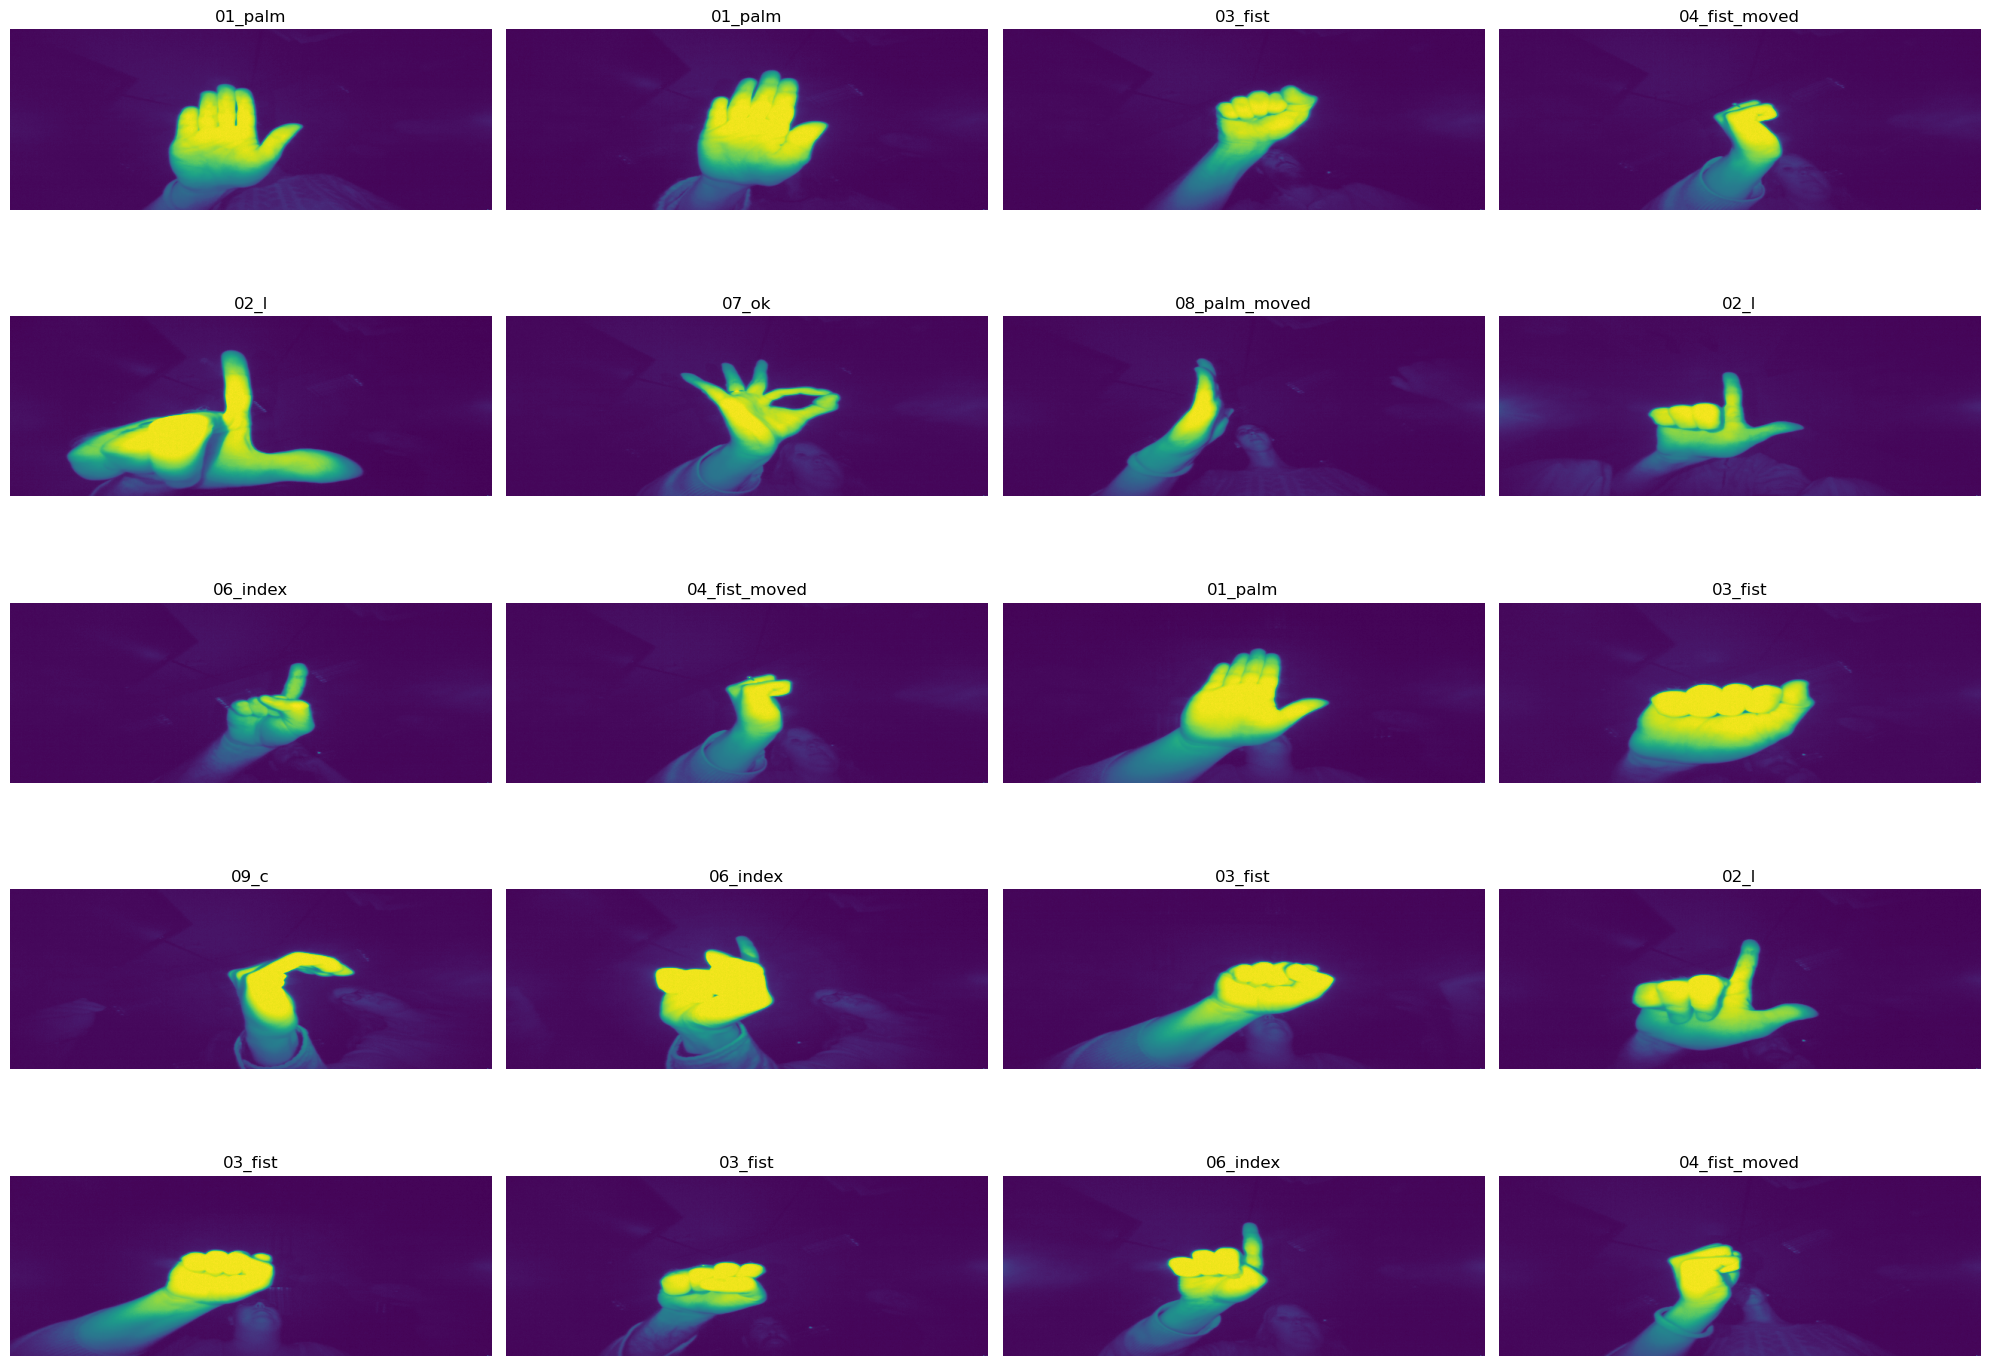

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import random

random_indices = random.sample(range(len(images)), 20)
random_images = [images[i] for i in random_indices]
random_labels = [labels[i] for i in random_indices]

fig, axes = plt.subplots(5, 4, figsize=(20, 15))
axes = axes.flatten()
for idx, (img_path, label) in enumerate(zip(random_images, random_labels)):
    try:
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(label)
        axes[idx].axis('off')
    except Exception as e:
        print(f"Error loading {img_path}: {e}")
        axes[idx].axis('off')

plt.tight_layout()
plt.show()


In [9]:
df = pd.DataFrame({'images': images, 'labels': labels})

# Encode labels
le = LabelEncoder()
df['labels'] = le.fit_transform(df['labels'])

# Convert images to arrays
x = []
y = np.array(df['labels'])
y = to_categorical(y)

img_size = (64, 64)
for img_path in df['images']:
    img = Image.open(img_path).convert('RGB')
    img_resized = img.resize(img_size)
    img_array = np.array(img_resized) / 255.0
    x.append(img_array)

x = np.array(x)

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=54)


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # adjust based on number of classes
])


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 274ms/step - accuracy: 0.4780 - loss: 1.7836 - val_accuracy: 0.5828 - val_loss: 1.6613
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 125s 251ms/step - accuracy: 0.9438 - loss: 0.1759 - val_accuracy: 0.9960 - val_loss: 0.0169
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 125s 250ms/step - accuracy: 0.9739 - loss: 0.1000 - val_accuracy: 0.9827 - val_loss: 0.0499
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 254ms/step - accuracy: 0.9819 - loss: 0.0628 - val_accuracy: 0.9975 - val_loss: 0.0089
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 145s 259ms/step - accuracy: 0.9868 - loss: 0.0484 - val_accuracy: 0.9992 - val_loss: 0.0047
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 128s 256ms/step - accuracy: 0.9872 - loss: 0.0566 - val_accuracy: 0.9975 - val_loss: 0.0051
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 127s 255ms/step - accuracy: 0.9882 - loss: 0.0454 - val_accuracy: 0.9977 - val_loss: 0.0209
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 128s 256ms/step - accuracy: 0.9877 -

In [12]:
print("*MODEL SUMMARY*")
model.summary()

print("\nTEST RESULTS")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss     : {test_loss}")
print(f"Test Accuracy : {test_accuracy}")


*MODEL SUMMARY*


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,923,808 (14.97 MB)

 Trainable params: 1,307,786 (4.99 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2,615,574 (9.98 MB)


TEST RESULTS
Test Loss     : 0.004673586692661047
Test Accuracy : 0.9992499947547913



MODEL PREDICTIONS
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step

CLASSIFICATION REPORT
               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       427
         02_l       1.00      1.00      1.00       384
      03_fist       1.00      1.00      1.00       391
04_fist_moved       1.00      1.00      1.00       397
     05_thumb       1.00      1.00      1.00       382
     06_index       1.00      1.00      1.00       383
        07_ok       1.00      1.00      1.00       410
08_palm_moved       1.00      1.00      1.00       384
         09_c       1.00      1.00      1.00       407
      10_down       1.00      1.00      1.00       435

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000



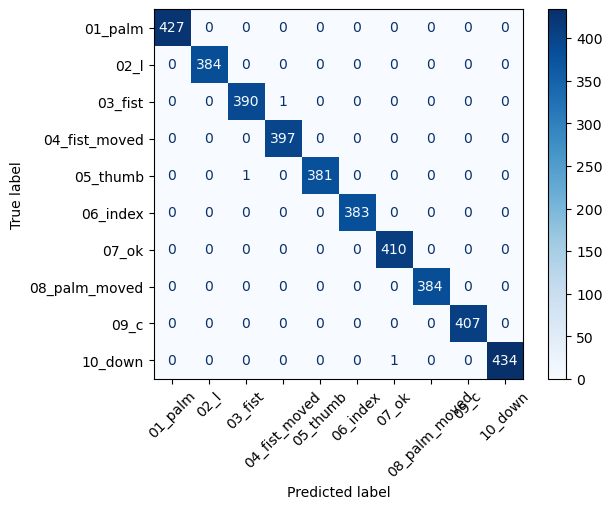

In [13]:
print("\nMODEL PREDICTIONS")
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("\nCLASSIFICATION REPORT")
print(classification_report(true_classes, predicted_classes, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()
